In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

Сгенерируем датасет, описывающий параметры книги и ее цену в магазине

In [2]:
# Плотность бумаги книги
density = np.random.choice(np.arange(35, 130, 1), size=300)
# Количество страниц книги
page_number = np.random.choice(np.arange(300, 1500, 1), size=300)
# Тираж книги
circulation = np.random.choice(np.arange(500, 50000, 500), size=300)
# Год публикации книги
year_publication = np.random.choice(np.arange(1980, 2021, 1), size=300)
# Ширина книги
book_width = np.random.choice(np.arange(100, 200, 1), size=300)
# Высота книги
book_height = np.random.choice(np.arange(100, 200, 1), size=300)
# Толщина книги
book_thickness = np.random.choice(np.arange(5, 20, 1), size=300)

# Цена книги (учитывается только плотность бумаги и количество страниц)
price = (density**2 * page_number / 10000)

In [3]:
df_books = pd.DataFrame({'density': density, 'page_number': page_number, 
                         'circulation': circulation, 'year_publication': year_publication, 
                         'book_width': book_width, 'book_height': book_height, 'price': price})
df_books

,density,page_number,circulation,year_publication,book_width,book_height,price
0,63,1336,500,1987,102,178,530.2584
1,127,435,4000,2014,101,104,701.6115
2,112,1352,17000,1998,153,148,1695.9488
3,63,1261,25000,2014,147,128,500.4909
4,121,914,17000,2006,100,162,1338.1874
...,...,...,...,...,...,...,...
295,74,868,42000,1999,171,117,475.3168
296,87,1019,40000,2002,107,168,771.2811
297,61,1170,35500,2007,122,115,435.3570
298,97,1051,4500,1980,186,119,988.8859


Попробуем рассмотреть графики корреляций между параметрами и таблицу корреляции методом Спирмена.

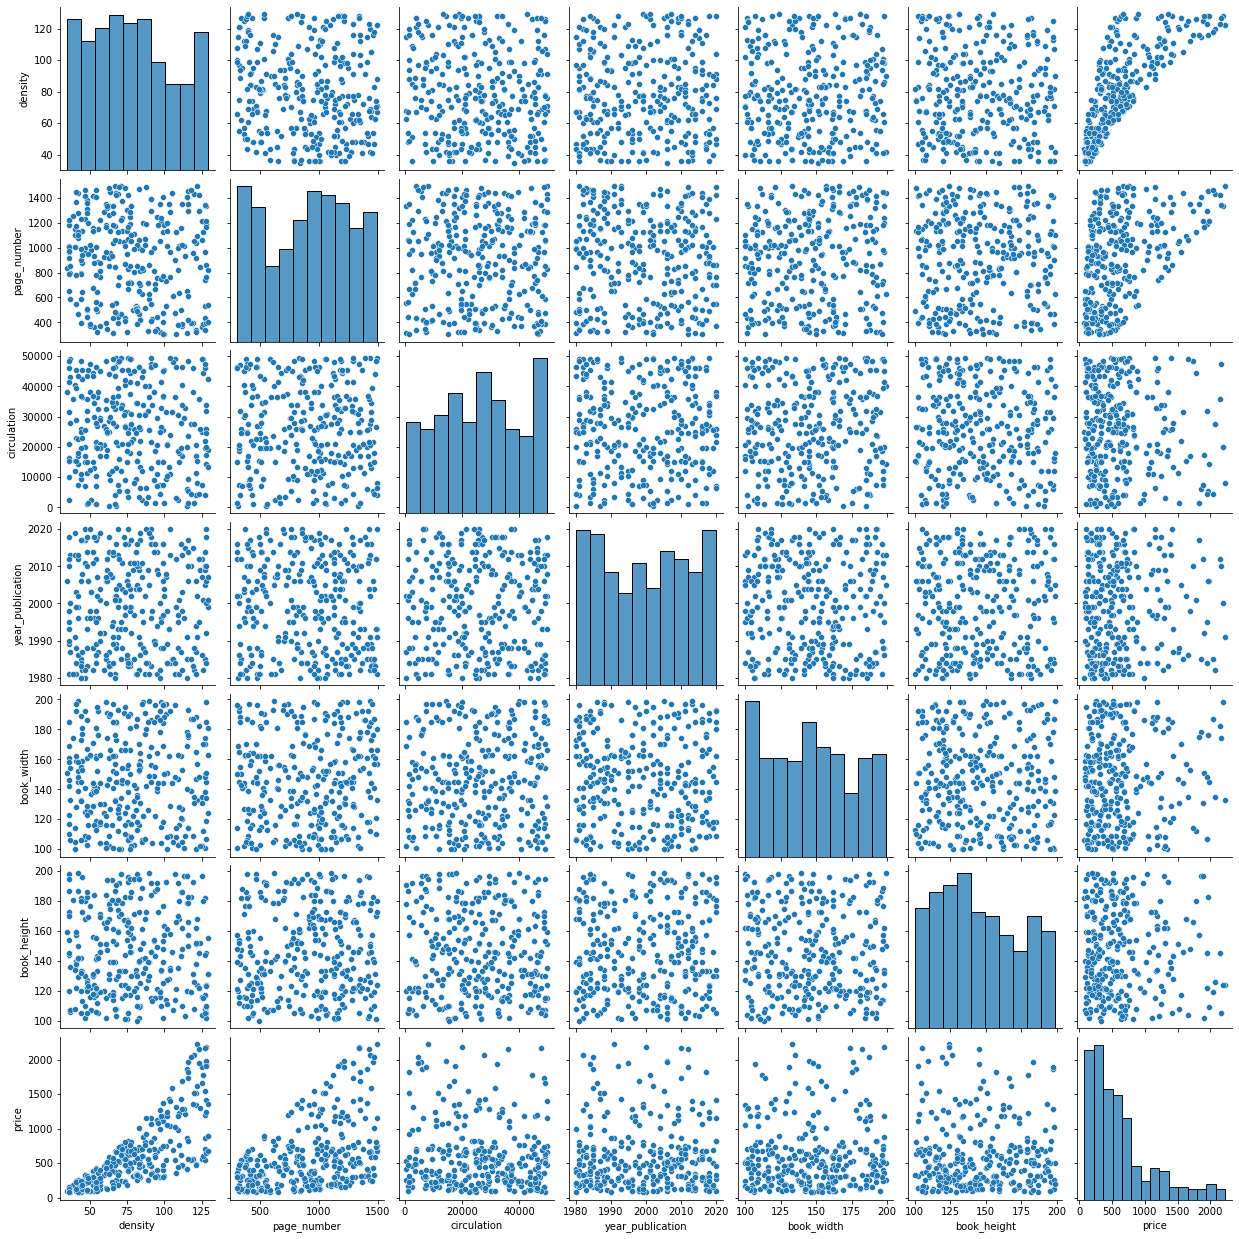

In [4]:
sns.pairplot(df_books)

In [5]:
df_books.corr(method='spearman')

,density,page_number,circulation,year_publication,book_width,book_height,price
density,1.000000,-0.115972,-0.072012,0.023693,0.016904,-0.017611,0.815794
page_number,-0.115972,1.000000,-0.004541,-0.051444,0.079593,0.011598,0.440481
circulation,-0.072012,-0.004541,1.000000,-0.004623,0.071852,-0.044895,-0.045198
year_publication,0.023693,-0.051444,-0.004623,1.000000,-0.056198,0.034369,0.012940
book_width,0.016904,0.079593,0.071852,-0.056198,1.000000,-0.054446,0.025948
book_height,-0.017611,0.011598,-0.044895,0.034369,-0.054446,1.000000,0.013708
price,0.815794,0.440481,-0.045198,0.012940,0.025948,0.013708,1.000000


Как видно из графиков и таблицы корреляции на стоимость очень сильно влияет плотность листа книги (коэфициент корреляции 0.849922) и почти с вдвое меньшей силой влияет количество страниц (коэфициент корреляции 0.489110). Остальные признаки практически никак не коррелируют с ценой. Отсюда можно сделать предположение, что остальные признаки являются неважными для нас.

Попробуем предсказать стоимость с помощью линейной регрессии и посчитать ошибку Mean Absolute Error

In [6]:
X = df_books[df_books.columns.drop('price')]
y = df_books['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print('Mean Absolute Error:',mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 124.28744931834223


Ошибка получается очень высокой, значит наши данные в текущем варианте плохо описывают нашу целевую переменную. Предположим, что наши данные может описать перемножение какой-либо комбинации наших данных. Попробуем использовать полином второго порядка.

In [7]:
pf = PolynomialFeatures(2)
pf.fit(X_train)
X_train_pol = pf.transform(X_train)
X_test_pol = pf.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_pol, y_train)
y_predict_pol = lr.predict(X_test_pol)
print('Mean Absolute Error:',mean_absolute_error(y_test, y_predict_pol))

Mean Absolute Error: 37.07465522224856


Ошибка уменьшилась, но все равно ее размер непримелим. Попробуем увеличить степень полинома до 3.

In [8]:
pf = PolynomialFeatures(3)
pf.fit(X_train)
X_train_pol = pf.transform(X_train)
X_test_pol = pf.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_pol, y_train)
y_predict_pol = lr.predict(X_test_pol)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict_pol))

Mean Absolute Error: 5.328410502948423e-10


Как видно из результата ошибки полином в третьей степени стал хорошо описывать наши данные.
Посмотрим на коэфициенты признаков полинома и выявим комбинация каких данных лучше всего описывает нашу целевую переменную.

In [9]:
sorted(list(zip(np.abs(lr.coef_), pf.get_feature_names())), reverse=True)[:10]

[(9.999999999993264e-05, 'x0^2 x1'),
 (2.147814496489382e-09, '1'),
 (7.632073295162381e-12, 'x0 x4'),
 (7.0498546514535286e-12, 'x5^2'),
 (3.677610138184693e-12, 'x0^2'),
 (3.397813910966364e-12, 'x1'),
 (2.6598540175307583e-12, 'x4 x5'),
 (2.415809985949074e-12, 'x0 x5'),
 (1.0216929340285479e-12, 'x0 x3'),
 (7.599920615271918e-13, 'x3 x5')]

Как видно из результата наибольшее влияние оказывает комбинация x0^2 x1.  
x0 - плотность бумаги  
x1 - число страниц  

В форммуле расчета цены у нас используется именно такая комбинация.

Попробуем предсказать наши данные только по такой формуле: x0^2 * x1

In [10]:
df_books['price_extra_param'] = df_books['density']**2 * df_books['page_number']

X = df_books[['price_extra_param']]
y = df_books['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 9.06336734058439e-14


После этой операции ошибка значительно уменьшилась и можно считать ее близкой к нулю. Проверим еще раз таблицу корреляции.

In [11]:
df_books.corr(method='spearman')

,density,page_number,circulation,year_publication,book_width,book_height,price,price_extra_param
density,1.000000,-0.115972,-0.072012,0.023693,0.016904,-0.017611,0.815794,0.815794
page_number,-0.115972,1.000000,-0.004541,-0.051444,0.079593,0.011598,0.440481,0.440481
circulation,-0.072012,-0.004541,1.000000,-0.004623,0.071852,-0.044895,-0.045198,-0.045198
year_publication,0.023693,-0.051444,-0.004623,1.000000,-0.056198,0.034369,0.012940,0.012940
book_width,0.016904,0.079593,0.071852,-0.056198,1.000000,-0.054446,0.025948,0.025948
book_height,-0.017611,0.011598,-0.044895,0.034369,-0.054446,1.000000,0.013708,0.013708
price,0.815794,0.440481,-0.045198,0.012940,0.025948,0.013708,1.000000,1.000000
price_extra_param,0.815794,0.440481,-0.045198,0.012940,0.025948,0.013708,1.000000,1.000000


Как видно из результатов наш новый параметр price_extra_param имеет корреляцию ценой равной 1. Значит этот параметр описывает нашу целевую переменную в полной мере.